In [1]:
cd ..

/home/luke/projects/CS6140-MatchingPursuit


In [2]:
%load_ext autoreload
%autoreload 2

In [112]:
from utils.dataset_utils import *
from utils.dictionary_generation import *
from utils.matching_pursuit import *
from utils.metrics import *

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
from IPython.display import HTML


In [116]:
num_frames = 300

images = loadVideo("dataset/2011_09_26", num_frames)

In [117]:
images = cropImages(images)

print("Num images: ", len(images))
print("Cropped Image size: ", np.shape(images[0]))

Num images:  114
Cropped Image size:  (200, 200)


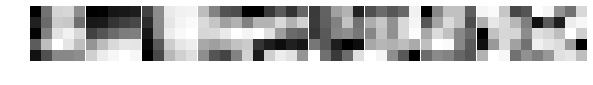

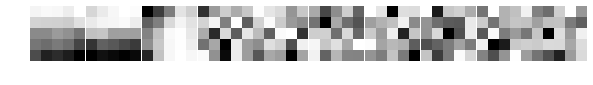

In [146]:
# Generate Dictionaries
patch_size = 5
num_samples = 100
num_features = 10

pca_features = generatePCADictionary(images, patch_size, num_samples, num_features)
optsparse_features = generateOptSparseDictionary(images, patch_size, num_samples, num_features)
plotDictionary(pca_features, "PCA")
plotDictionary(optsparse_features, "OptSparse")

In [154]:
# Run through whole video
k = 800

# Test all dicts
pca_code, video_recon_pca = videoMatchingPursuit(images, pca_features, k, greedyMatchingPursuit)
pca_code_optsparse, video_recon_optsparse = videoMatchingPursuit(images, optsparse_features, k, greedyMatchingPursuit)

# Test all algos
# pca_code_orth, video_recon_orth = videoMatchingPursuit(images, pca_features, k, orthogonalMatchingPursuit)

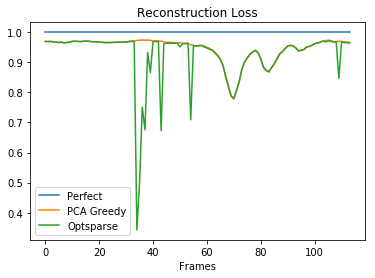

In [155]:
# Plot the loss as a function of time
recon_loss_pca = videoLoss(images, video_recon_pca, reconstructionRatio)
recon_loss_optsparse = videoLoss(images, video_recon_optsparse, reconstructionRatio)
plt.plot(np.ones(len(images)), label="Perfect")
plt.plot(recon_loss_pca, label="PCA Greedy")
plt.plot(recon_loss_optsparse, label="Optsparse")
# plt.plot(recon_loss_pca_orth, label="PCA Orth")

# plt.plot(recon_loss_optsparse, "g", label="OptSparse")
plt.xlabel("Frames")
plt.legend()
plt.title("Reconstruction Loss")
plt.show()

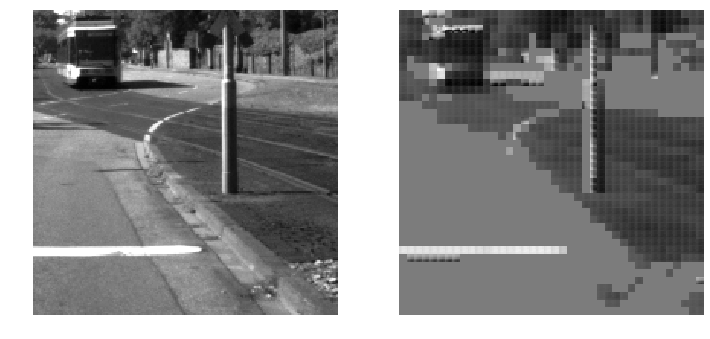

In [156]:
ani = compareVideos(images, video_recon_pca);
HTML(ani.to_html5_video())

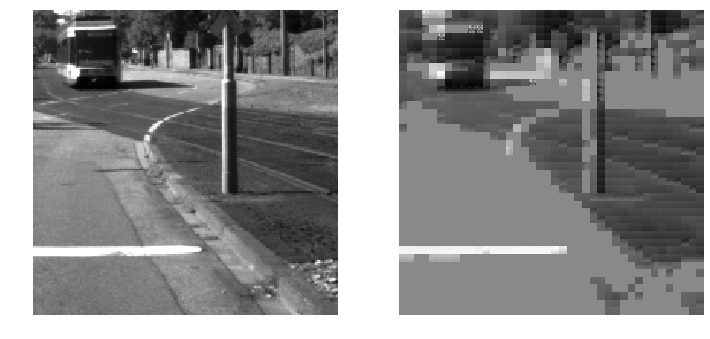

In [157]:
ani = compareVideos(images, video_recon_optsparse);
HTML(ani.to_html5_video())

In [75]:
a = np.array([1, 2, 3, 4, 5])

a[[0]]

array([1])